In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('banknote-authentication_csv.csv')
data.head()

,V1,V2,V3,V4,Class
0,3.62160,8.6661,-2.8073,-0.44699,1
1,4.54590,8.1674,-2.4586,-1.46210,1
2,3.86600,-2.6383,1.9242,0.10645,1
3,3.45660,9.5228,-4.0112,-3.59440,1
4,0.32924,-4.4552,4.5718,-0.98880,1


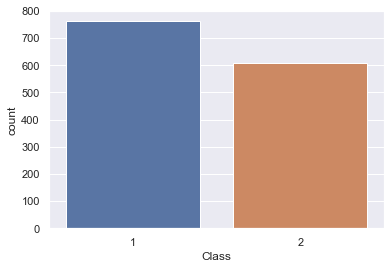

In [5]:
sns.countplot(x='Class', data = data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000206F0DF1208>,
      dtype=object)

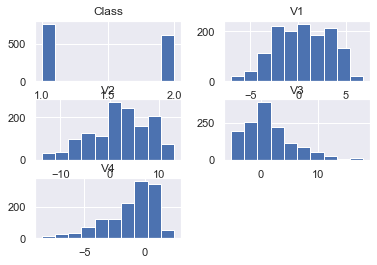

In [6]:
data.hist()

In [7]:
data.columns

Index(['V1', 'V2', 'V3', 'V4', 'Class'], dtype='object')

In [8]:
data.shape

(1372, 5)

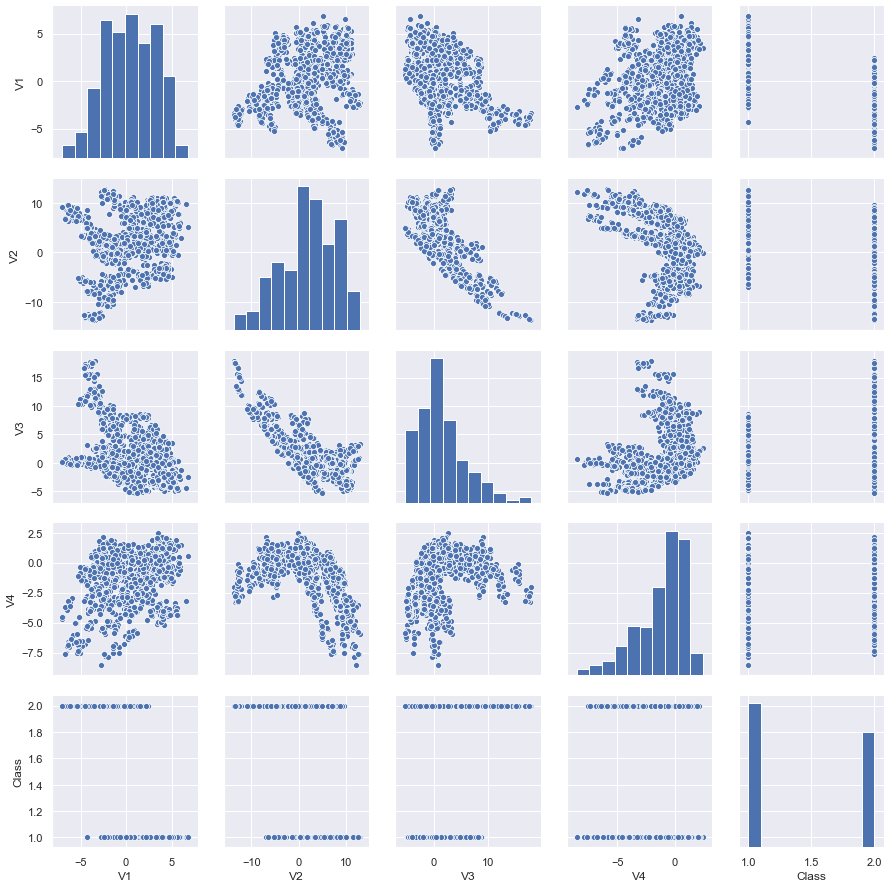

In [9]:
sns.pairplot(data)

In [10]:
X = data.iloc[:,0:4].values
y = data.iloc[:,4].values
print(X.shape)
print(y.shape)

(1372, 4)
(1372,)


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [17]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       157
           2       1.00      1.00      1.00       118

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

[[157   0]
 [  0 118]]
1.0


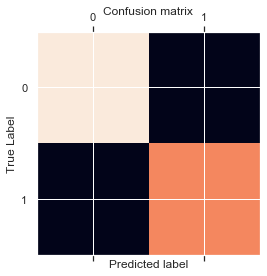

[[157   0]
 [  0 118]]


In [18]:
cm = confusion_matrix(y_test,y_pred)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted label')
plt.show()
print(cm)

In [19]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200,random_state=0)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

In [21]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99       157
           2       0.98      0.99      0.99       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

[[155   2]
 [  1 117]]
0.9890909090909091


In [23]:
from sklearn.svm import SVC
svc = SVC(kernel='poly',degree=8)
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [24]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.99      0.97      0.98       157
           2       0.96      0.99      0.97       118

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275

[[152   5]
 [  1 117]]
0.9781818181818182
